###Tugas 1

####Load Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CC_Customer_Dataset.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


####Aglomerative Clustering

#####Import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

#####Slicing Data

In [ ]:
X = df.drop(['Sl_No', 'Customer Key'], axis=1)
print(X.head())

   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0            100000                   2                  1   
1             50000                   3                  0   
2             50000                   7                  1   
3             30000                   5                  1   
4            100000                   6                  0   

   Total_visits_online  Total_calls_made  Cluster  
0                    1                 0        0  
1                   10                 9        1  
2                    3                 4        0  
3                    1                 4        0  
4                   12                 3        2  


#####Standarisasi Data

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#####Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
cluster_labels = hc.fit_predict(X_scaled)
df['Cluster'] = cluster_labels

####Visualisasi Scatter Plot Avg_Credit_Limit dan Total_credit_card

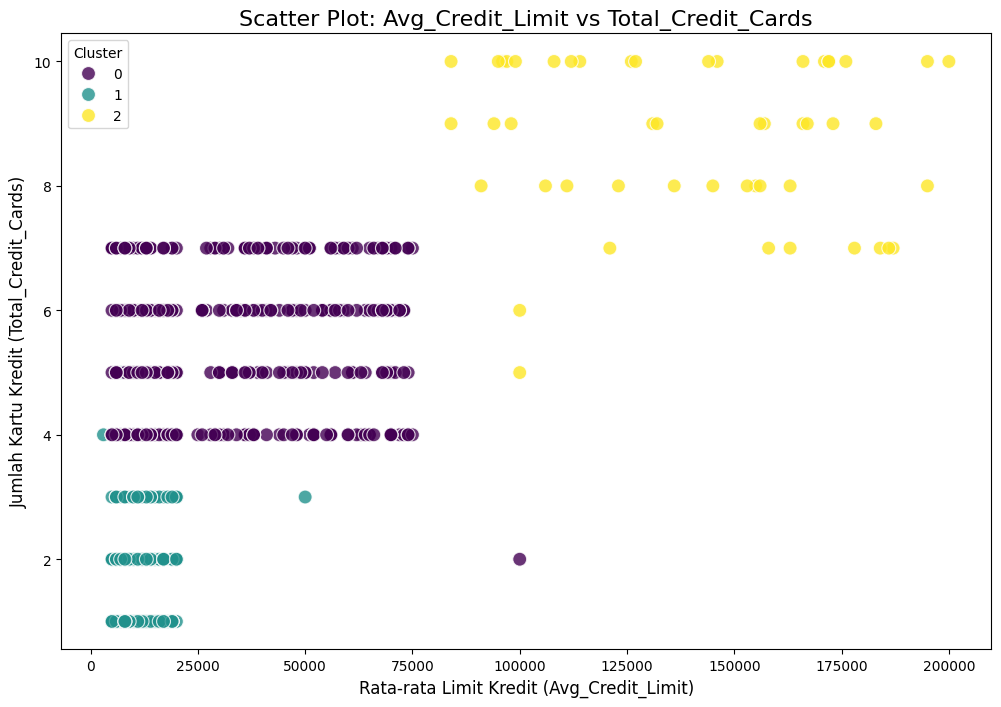

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Avg_Credit_Limit', y='Total_Credit_Cards', hue='Cluster', palette='viridis', s=100, alpha=0.8)
plt.title('Scatter Plot: Avg_Credit_Limit vs Total_Credit_Cards', fontsize=16)
plt.xlabel('Rata-rata Limit Kredit (Avg_Credit_Limit)', fontsize=12)
plt.ylabel('Jumlah Kartu Kredit (Total_Credit_Cards)', fontsize=12)
plt.legend(title='Cluster')
plt.show()

####Silhouette Score dan DBI

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

sil_score = silhouette_score(X_scaled, cluster_labels)
db_score = davies_bouldin_score(X_scaled, cluster_labels)

print(f"Silhouette Score: {sil_score}")
print(f"Davies-Bouldin Score: {db_score}")

Silhouette Score: 0.5704543480595624
Davies-Bouldin Score: 0.5928598126739346


###Tugas 2

In [ ]:
import hdbscan
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


In [ ]:
iris = load_iris()
data = iris.data

####Clustering HDBSCAN

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(data)

labels = clusterer.labels_

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


####Jumlah Cluster & Banyak Noise

In [ ]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Analisis HDBSCAN pada Iris Dataset:")
print("-" * 35)
print(f"Jumlah cluster yang terbentuk: {n_clusters}")
print(f"Banyaknya data yang dianggap noise: {n_noise}")
print(f"Total data: {len(data)}")

Analisis HDBSCAN pada Iris Dataset:
-----------------------------------
Jumlah cluster yang terbentuk: 2
Banyaknya data yang dianggap noise: 0
Total data: 150


####Visualisasi

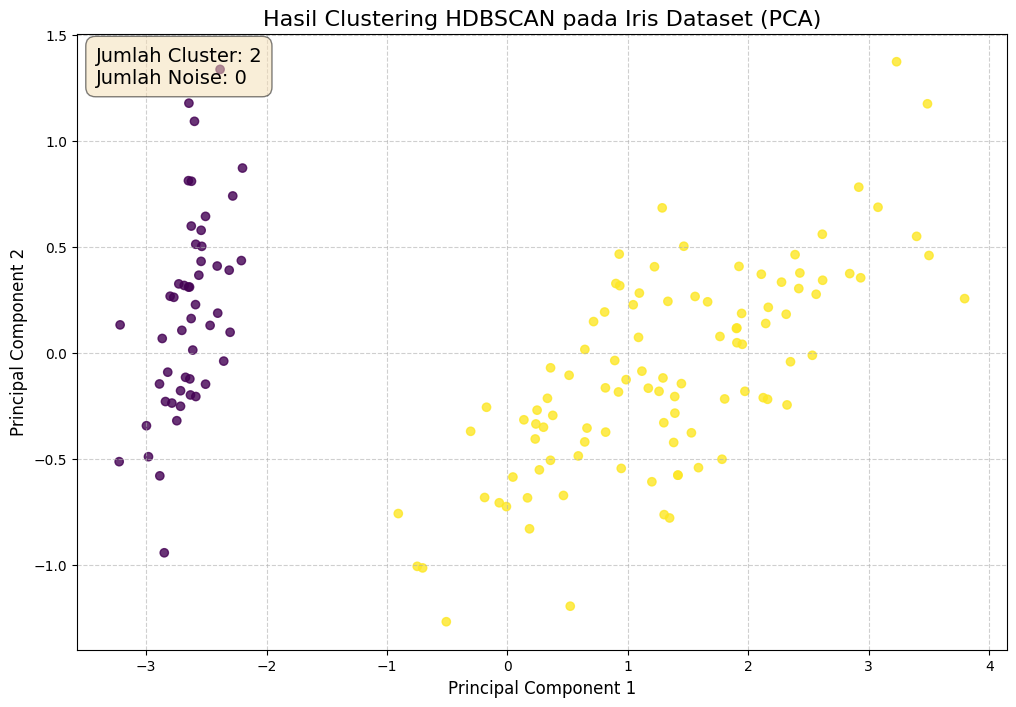

In [ ]:
pca = PCA(n_components=2)
projected_data = pca.fit_transform(data)

plt.figure(figsize=(12, 8))
plt.scatter(projected_data[:, 0], projected_data[:, 1], c=labels, cmap='viridis', alpha=0.8)
plt.title(f'Hasil Clustering HDBSCAN pada Iris Dataset (PCA)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.text(0.02, 0.98, f'Jumlah Cluster: {n_clusters}\nJumlah Noise: {n_noise}',
         transform=plt.gca().transAxes, fontsize=14, verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))
plt.show()

Algoritma HDBSCAN sukses mengidentifikasi dan memisahkan kelas Iris setosa dengan sempurna. Namun, gagal membedakan antara kelas Iris versicolor dan Iris virginica, sehingga menggabungkan keduanya menjadi satu cluster.